## TEIS IFSP Teaming Data Question

[The Tennessee Early Intervention System (TEIS)](https://www.tn.gov/didd/for-consumers/tennessee-early-intervention-system-teis.html) is a program that provides services to children ages birth up to age three who have disabilities or other developmental delays. In this project, you'll be looking into how teams that support children work together. 

You've been provided a spreadsheet containing data on children who received IFSP Teaming services. This spreadsheet is divided into two tabs.
* Tab 1 contains log details of all children receiving IFSP Teaming services between January 1, 2022 and January 31, 2023. See the data dictionary for a description of each column.
* Tab 2 contains a list of all children with IFSPs during the same timeframe. This includes a point of entry office, a referral date and an exit date.

Analysis Questions:
* How many children are receiving co-visits? What is the rate of co-visits? That is, out of children how have an IFSP, how many are receiving co-visits?
* Children can have up to 6 co-visits per year. How many are recieving all 6 visits? Are there any who are exceeding 6 visits?
* What is the cadence of co-visits?
* In what setting do co-visits typically occur?
* Who is performing co-visits? Are they generally performed by the same provider or discipline or by multiple providers or disciplines? Is it more likely for a co-visit to occur if vendor services are within th esame agency? 
* Does participation vary by service type? by point of entry?

In [2]:
import pandas as pd

# Read both tabs from the XLSX file
data_sheet1 = pd.read_excel('TEIS_IFSP_Teaming_Jan_2022-_Jan_2023.xlsx', sheet_name='Compiled_IFSP Teaming')
data_sheet2 = pd.read_excel('TEIS_IFSP_Teaming_Jan_2022-_Jan_2023.xlsx', sheet_name='All Children with IFSPs')



c:\Users\ahask\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


* How many children are receiving co-visits? What is the rate of co-visits? That is, out of children how have an IFSP, how many are receiving co-visits?

In [3]:
print(data_sheet1['IFSP Teaming ID name'].unique())
print(data_sheet1['SERVICE DELIVERY'].unique())

['IEP Meeting' 'Co-Visit' 'IFSP Meeting']
['Service Delivered' 'Absence Due to Family' 'Family No Show'
 'Absence Due to Provider']


In [4]:
import pandas as pd


# Read the "Compiled_IFSP Teaming" sheet from the XLSX file
data_sheet1 = pd.read_excel('TEIS_IFSP_Teaming_Jan_2022-_Jan_2023.xlsx', sheet_name='Compiled_IFSP Teaming')

# Filter the data to include only rows where co-visits are happening
co_visits_data = data_sheet1[(data_sheet1['IFSP Teaming ID name'].str.strip() == 'Co-Visit') & (data_sheet1['SERVICE DELIVERY'].str.strip() == 'Service Delivered')]


# Calculate the number of children receiving co-visits
num_children_receiving_co_visits = len(co_visits_data)

# Calculate the rate of co-visits
num_children_with_ifsp = len(data_sheet1)
rate_of_co_visits = round(num_children_receiving_co_visits / num_children_with_ifsp , 2) * 100

# Print the results
print("Number of children receiving co-visits:", num_children_receiving_co_visits)
print("Rate of co-visits (%):", rate_of_co_visits)


Number of children receiving co-visits: 4087
Rate of co-visits (%): 43.0


* Children can have up to 6 co-visits per year. How many are recieving all 6 visits? Are there any who are exceeding 6 visits?

In [5]:

#Nick's initial code:

ifsp_teaming_df = pd.read_excel('TEIS_IFSP_Teaming_Jan_2022-_Jan_2023.xlsx', sheet_name='Compiled_IFSP Teaming')
covisit_df = ifsp_teaming_df[ifsp_teaming_df['IFSP Teaming ID name'] == 'Co-Visit']

n_children_receiving_6_visits_per_year = 0
n_children_receiving_more_than_6_visits_per_year = 0
children_covisit_insights = {}
service_settings = {
    'community_based': 0,
    'error': 0,
    'home': 0,
    'other': 0,
    'telehealth': 0
}

for index, row in covisit_df.iterrows():
    # excluding any records where the date is in the month january 2022 in order to only use 1 year of data
    year_month = row['SERVICE_DATE'].strftime('%Y-%m')
    if year_month == '2022-01': continue

    # Building the dictionary entry
    child_id = row['CHILD_ID']
    if child_id not in children_covisit_insights:
        children_covisit_insights[child_id] = {
            'n_visits': 1,
            '6_or_more_visits': False,
        }
    else:
        children_covisit_insights[child_id]['n_visits'] += 1

        if children_covisit_insights[child_id]['n_visits'] == 6:
            n_children_receiving_6_visits_per_year += 1
        elif children_covisit_insights[child_id]['n_visits'] > 6:
            # If a child is receiving more than 6 visits per year, we only want to count them once
            if children_covisit_insights[child_id]['6_or_more_visits'] == False:
                n_children_receiving_more_than_6_visits_per_year += 1
                children_covisit_insights[child_id]['6_or_more_visits'] = True

    # Incrementing the appropriate service setting
    service_setting = str(row['SERVICE_SETTING']).lower()
    if service_setting == 'community-based':
        service_settings['community_based'] += 1
    elif service_setting == 'home':
        service_settings['home'] += 1
    elif service_setting == 'other':
        service_settings['other'] += 1
    elif service_setting == 'telehealth':
        service_settings['telehealth'] += 1
    else:
        service_settings['error'] += 1

# Insights
print(f'Number of children receiving 6 visits per year: {n_children_receiving_6_visits_per_year}')
print(f'Number of children receiving more than 6 visits per year: {n_children_receiving_more_than_6_visits_per_year}')
print(f'The most common service setting is: {max(service_settings, key=service_settings.get)}')
print(children_covisit_insights)
print(service_settings)

Number of children receiving 6 visits per year: 121
Number of children receiving more than 6 visits per year: 87
The most common service setting is: home
{457136: {'n_visits': 1, '6_or_more_visits': False}, 458850: {'n_visits': 1, '6_or_more_visits': False}, 458851: {'n_visits': 1, '6_or_more_visits': False}, 459167: {'n_visits': 3, '6_or_more_visits': False}, 459566: {'n_visits': 1, '6_or_more_visits': False}, 460965: {'n_visits': 4, '6_or_more_visits': False}, 461124: {'n_visits': 1, '6_or_more_visits': False}, 462527: {'n_visits': 1, '6_or_more_visits': False}, 462846: {'n_visits': 1, '6_or_more_visits': False}, 462915: {'n_visits': 1, '6_or_more_visits': False}, 462936: {'n_visits': 1, '6_or_more_visits': False}, 463479: {'n_visits': 2, '6_or_more_visits': False}, 463625: {'n_visits': 1, '6_or_more_visits': False}, 463637: {'n_visits': 5, '6_or_more_visits': False}, 463874: {'n_visits': 1, '6_or_more_visits': False}, 464127: {'n_visits': 1, '6_or_more_visits': False}, 464262: {'n_v

In [6]:
#Kevin's initial code:
q1_df = ifsp_teaming_df[ifsp_teaming_df["IFSP Teaming ID name"] == 'Co-Visit']
q1_df1 = q1_df[q1_df["SERVICE DELIVERY"] == 'Service Delivered']
q1_df1

q4_df = q1_df1['SERVICE_SETTING'].value_counts(normalize=True) * 100

over_6 = q1_df1.groupby(['CHILD_ID']).size()
over_6_sort = over_6.sort_values(ascending=False)
over_6_real = len(over_6_sort.loc[lambda x : x > 6])
over_6_real

only_6 = len(over_6_sort.loc[lambda x : x == 6])
only_6

34

In [7]:
#Are there patterns in timeof year that co-visits occur?
co_visits_per_month = {}
for index, row in covisit_df.iterrows():
    year_month = row['SERVICE_DATE'].strftime('%Y-%m')
    if year_month == '2022-01':
        continue
    if year_month not in co_visits_per_month:
        co_visits_per_month[year_month] = 1
    else:
        co_visits_per_month[year_month] += 1

# Print the co-visits per month
for month, count in co_visits_per_month.items():
    print(f'Number of co-visits in {month}: {count}')


Number of co-visits in 2022-02: 327
Number of co-visits in 2022-03: 382
Number of co-visits in 2022-04: 303
Number of co-visits in 2022-05: 333
Number of co-visits in 2022-06: 334
Number of co-visits in 2022-07: 235
Number of co-visits in 2022-08: 284
Number of co-visits in 2022-12: 311
Number of co-visits in 2022-10: 290
Number of co-visits in 2023-01: 392
Number of co-visits in 2022-09: 280
Number of co-visits in 2022-11: 322


• Are there patterns in the time of year where more than 6 co-visits occur? and what is the most utilized co-visit setting?

In [8]:
co_visits_exceeding_6_per_month = {}
co_visits_service_settings = {}

for index, row in covisit_df.iterrows():
    year_month = row['SERVICE_DATE'].strftime('%Y-%m')
    if year_month == '2022-01':
        continue

    # Count co-visits exceeding the 6 limit per year
    child_id = row['CHILD_ID']
    if children_covisit_insights[child_id]['n_visits'] > 6:
        if year_month not in co_visits_exceeding_6_per_month:
            co_visits_exceeding_6_per_month[year_month] = 1
        else:
            co_visits_exceeding_6_per_month[year_month] += 1

    # Count co-visits per service setting
    service_setting = str(row['SERVICE_SETTING']).lower()
    if service_setting not in co_visits_service_settings:
        co_visits_service_settings[service_setting] = 1
    else:
        co_visits_service_settings[service_setting] += 1

# Print co-visits exceeding 6 per month
print("Co-visits exceeding the 6 limit per year:")
for month, count in co_visits_exceeding_6_per_month.items():
    print(f'Number of co-visits exceeding 6 in {month}: {count}')

# Print co-visits per service setting
print("Co-visits per service setting:")
for setting, count in co_visits_service_settings.items():
    print(f'Number of co-visits in {setting.capitalize()} setting: {count}')


Co-visits exceeding the 6 limit per year:
Number of co-visits exceeding 6 in 2022-03: 119
Number of co-visits exceeding 6 in 2022-04: 89
Number of co-visits exceeding 6 in 2022-05: 108
Number of co-visits exceeding 6 in 2022-06: 109
Number of co-visits exceeding 6 in 2022-07: 71
Number of co-visits exceeding 6 in 2022-02: 110
Number of co-visits exceeding 6 in 2022-08: 84
Number of co-visits exceeding 6 in 2022-09: 70
Number of co-visits exceeding 6 in 2023-01: 92
Number of co-visits exceeding 6 in 2022-10: 68
Number of co-visits exceeding 6 in 2022-11: 95
Number of co-visits exceeding 6 in 2022-12: 72
Co-visits per service setting:
Number of co-visits in Community-based setting: 833
Number of co-visits in Telehealth setting: 666
Number of co-visits in Home setting: 1806
Number of co-visits in Other setting: 485
Number of co-visits in Nan setting: 3


In [9]:
co_visits_exceeding_6_per_month = {}
co_visits_service_settings = {}

for index, row in covisit_df.iterrows():
    year_month = row['SERVICE_DATE'].strftime('%Y-%m')
    if year_month == '2022-01':
        continue

    # Count co-visits exceeding the 6 limit per year
    child_id = row['CHILD_ID']
    if children_covisit_insights[child_id]['n_visits'] > 6:
        if year_month not in co_visits_exceeding_6_per_month:
            co_visits_exceeding_6_per_month[year_month] = 1
        else:
            co_visits_exceeding_6_per_month[year_month] += 1

        # Count co-visits per service setting
        service_setting = str(row['SERVICE_SETTING']).lower()
        if service_setting not in co_visits_service_settings:
            co_visits_service_settings[service_setting] = 1
        else:
            co_visits_service_settings[service_setting] += 1

# Print co-visits exceeding 6 per month
print("Co-visits exceeding the 6 limit per year:")
for month, count in co_visits_exceeding_6_per_month.items():
    print(f'Number of co-visits exceeding 6 in {month}: {count}')

# Print co-visits per service setting that exceed 6 visits per year
print("Co-visits per service setting exceeding 6 visits per year:")
for setting, count in co_visits_service_settings.items():
    if count > 6:
        print(f'Number of co-visits in {setting.capitalize()} setting: {count}')


Co-visits exceeding the 6 limit per year:
Number of co-visits exceeding 6 in 2022-03: 119
Number of co-visits exceeding 6 in 2022-04: 89
Number of co-visits exceeding 6 in 2022-05: 108
Number of co-visits exceeding 6 in 2022-06: 109
Number of co-visits exceeding 6 in 2022-07: 71
Number of co-visits exceeding 6 in 2022-02: 110
Number of co-visits exceeding 6 in 2022-08: 84
Number of co-visits exceeding 6 in 2022-09: 70
Number of co-visits exceeding 6 in 2023-01: 92
Number of co-visits exceeding 6 in 2022-10: 68
Number of co-visits exceeding 6 in 2022-11: 95
Number of co-visits exceeding 6 in 2022-12: 72
Co-visits per service setting exceeding 6 visits per year:
Number of co-visits in Telehealth setting: 142
Number of co-visits in Community-based setting: 131
Number of co-visits in Home setting: 645
Number of co-visits in Other setting: 169


•Possible charts and graphs to display previous outcomes


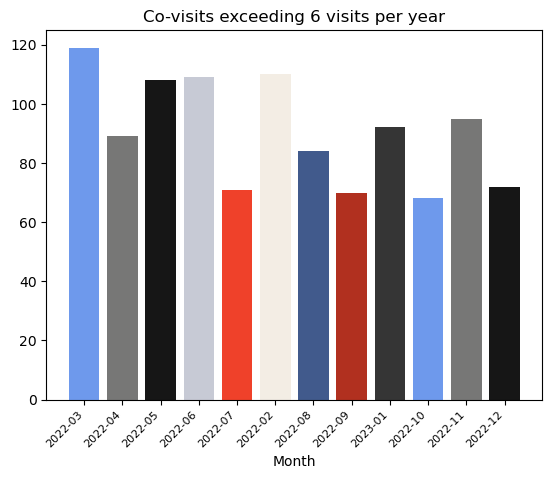

In [18]:
import matplotlib.pyplot as plt

# Color codes
colors = ["#6E99EC" , "#777776" , "#161616" , "#C7CAD5" , "#EF412A" , "#F3EDE4" , "#415A8C" , "#B1301F" , "#353535"]

# Plot co-visits exceeding 6 per month with custom colors
plt.bar(co_visits_exceeding_6_per_month.keys(), co_visits_exceeding_6_per_month.values(), color=colors)
plt.xlabel('Month')
plt.title('Co-visits exceeding 6 visits per year')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()


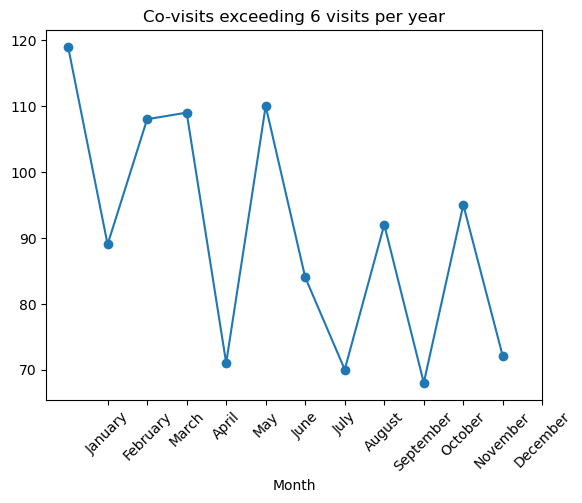

In [11]:
import calendar

# Convert dictionary to pandas Series for easy plotting
co_visits_series = pd.Series(co_visits_exceeding_6_per_month)

# Plot co-visits exceeding 6 per month as a line plot
co_visits_series.plot(marker='o')
plt.xlabel('Month')
plt.title('Co-visits exceeding 6 visits per year')
plt.xticks(range(1, 13), calendar.month_name[1:13], rotation=45)
plt.show()


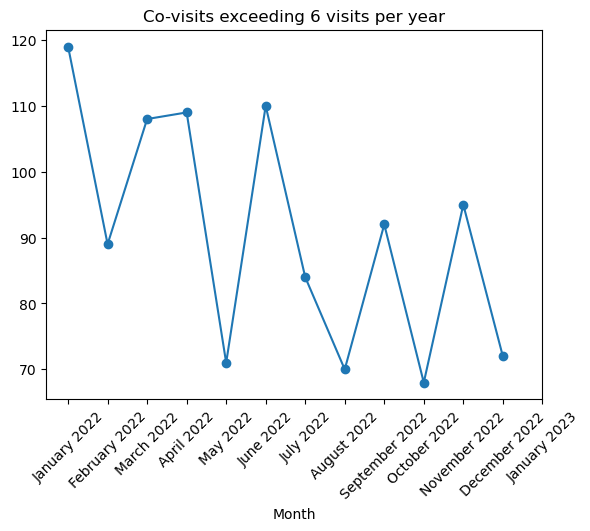

In [12]:
import calendar

# Convert dictionary to pandas Series for easy plotting
co_visits_series = pd.Series(co_visits_exceeding_6_per_month)

# Plot co-visits exceeding 6 per month as a line plot
co_visits_series.plot(marker='o')
plt.xlabel('Month')
plt.title('Co-visits exceeding 6 visits per year')
plt.xticks(range(0, 13), [calendar.month_name[i%12+1] + ' ' + str(2022 + i//12) for i in range(13)], rotation=45)
plt.show()


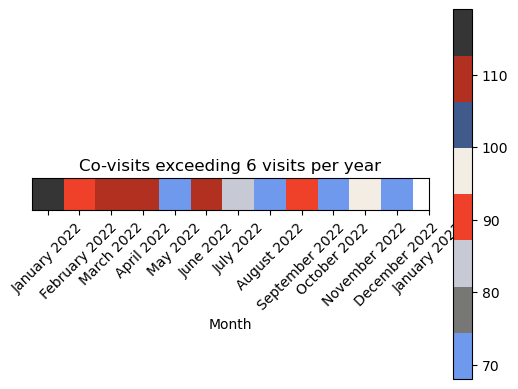

In [17]:
import calendar
import numpy as np

# Define the color map
cmap = plt.cm.colors.ListedColormap(colors)
colors = ["#6E99EC" , "#777776" , "#161616" , "#C7CAD5" , "#EF412A" , "#F3EDE4" , "#415A8C" , "#B1301F" , "#353535"]
# Convert dictionary to numpy array
co_visits_array = np.array(list(co_visits_exceeding_6_per_month.values())).reshape(1, -1)

# Create the heatmap
plt.imshow(co_visits_array, cmap=cmap)
plt.colorbar()
plt.xlabel('Month')
plt.title('Co-visits exceeding 6 visits per year')
plt.xticks(range(0, 13), [calendar.month_name[i % 12 + 1] + ' ' + str(2022 + i // 12) for i in range(13)], rotation=45)
plt.yticks([])  # Remove y-axis ticks
plt.show()


# Color codes
colors = ["#6E99EC" , "#777776" , "#161616" , "#C7CAD5" , "#EF412A" , "#F3EDE4" , "#415A8C" , "#B1301F" , "#353535"]

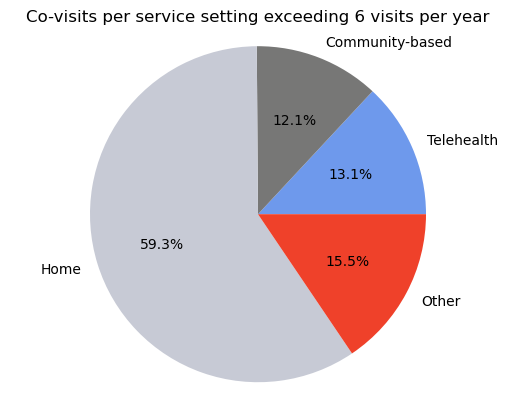

In [16]:
import matplotlib.pyplot as plt

# Color codes
colors = ["#6E99EC" , "#777776"  , "#C7CAD5" , "#EF412A" , "#F3EDE4" , "#415A8C" , "#B1301F" , "#353535"]

# Create a list of labels and values for pie chart
labels = []
sizes = []
for setting, count in co_visits_service_settings.items():
    if count > 6:
        labels.append(setting.capitalize())
        sizes.append(count)

# Plot co-visits per service setting exceeding 6 visits per year with custom colors
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Co-visits per service setting exceeding 6 visits per year')
plt.axis('equal')
plt.show()
